<a href="https://colab.research.google.com/github/parthkohli92/Practice-Projects/blob/main/Unlocking_Climate_Solutions_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! pip install kaggle

In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle competitions download -c cdp-unlocking-climate-solutions

  0% 0.00/14.2k [00:00<?, ?B/s]
100% 14.2k/14.2k [00:00<00:00, 24.6MB/s]
  0% 0.00/13.3k [00:00<?, ?B/s]
100% 13.3k/13.3k [00:00<00:00, 14.2MB/s]
  0% 0.00/743k [00:00<?, ?B/s]
100% 743k/743k [00:00<00:00, 48.7MB/s]
 58% 9.00M/15.5M [00:00<00:00, 13.8MB/s]
100% 15.5M/15.5M [00:00<00:00, 22.6MB/s]
  0% 0.00/843 [00:00<?, ?B/s]
100% 843/843 [00:00<00:00, 636kB/s]
  0% 0.00/315 [00:00<?, ?B/s]
100% 315/315 [00:00<00:00, 583kB/s]
  0% 0.00/1.24M [00:00<?, ?B/s]
100% 1.24M/1.24M [00:00<00:00, 49.9MB/s]
 98% 5.00M/5.09M [00:01<00:00, 4.22MB/s]
100% 5.09M/5.09M [00:01<00:00, 4.21MB/s]
  0% 0.00/605k [00:00<?, ?B/s]
100% 605k/605k [00:00<00:00, 38.6MB/s]
  0% 0.00/52.9k [00:00<?, ?B/s]
100% 52.9k/52.9k [00:00<00:00, 55.4MB/s]
  0% 0.00/542 [00:00<?, ?B/s]
100% 542/542 [00:00<00:00, 550kB/s]
  0% 0.00/32.6k [00:00<?, ?B/s]
100% 32.6k/32.6k [00:00<00:00, 32.7MB/s]
  0% 0.00/17.0k [00:00<?, ?B/s]
100% 17.0k/17.0k [00:00<00:00, 17.3MB/s]
  0% 0.00/422k [00:00<?, ?B/s]
100% 422k/422k [00:00<00:00, 

### PROBLEM STATEMENT

To Develop a methodology for calculating key performance indicators (KPIs) that relate to the environmental and social issues that are discussed in the CDP survey data. Leverage external data sources and thoroughly discuss the intersection between environmental issues and social issues. Mine information to create automated insight generation demonstrating whether city and corporate ambitions take these factors into account.

In [12]:
import numpy as np 
import pandas as pd 
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud 
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [13]:
## Reading Dataset - Cities Disclosing
cities_2018 = pd.read_csv("/content/2018_Cities_Disclosing_to_CDP.csv")
cities_2019 = pd.read_csv("/content/2019_Cities_Disclosing_to_CDP.csv")
cities_2020 = pd.read_csv("/content/2020_Cities_Disclosing_to_CDP.csv")

In [14]:
data = cities_2018.append([cities_2018, cities_2019, cities_2020])
x = data.iloc[:, [3]].values

In [16]:
data.head(3)

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update
0,2018,58671,Helsingør Kommune / Elsinore Municipality,Helsingør,Denmark,Europe,CDP Cities,public,No,62686.0,2017,POINT (12.5921 56.0308),2020-06-25T04:52:49.050
1,2018,59167,Municipalidad de Providencia,Providencia,Chile,Latin America,CDP Cities,public,No,126487.0,2012,POINT (-70.6092 -33.4313),2020-06-25T04:52:49.050
2,2018,50553,City of Fresno,Fresno,United States of America,North America,CDP Cities,public,Yes,527438.0,2017,POINT (-119.773 36.7468),2020-06-25T04:52:49.050


Comparing population of each country, first group the country and get max, min and avg (mean) of population

In [19]:
display(data[['Country', 'Population']].groupby(["Country"]).agg(["max","mean","min"]).style.background_gradient(cmap="cool"))

In [20]:
data['Account_Number'] = data['Account Number']
data['Population_Year'] = data['Population Year']
data['Reporting_Authority'] = data['Reporting Authority']

data

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update,Account_Number,Population_Year,Reporting_Authority
0,2018,58671,Helsingør Kommune / Elsinore Municipality,Helsingør,Denmark,Europe,CDP Cities,public,No,62686.0,2017,POINT (12.5921 56.0308),2020-06-25T04:52:49.050,58671,2017,CDP Cities
1,2018,59167,Municipalidad de Providencia,Providencia,Chile,Latin America,CDP Cities,public,No,126487.0,2012,POINT (-70.6092 -33.4313),2020-06-25T04:52:49.050,59167,2012,CDP Cities
2,2018,50553,City of Fresno,Fresno,United States of America,North America,CDP Cities,public,Yes,527438.0,2017,POINT (-119.773 36.7468),2020-06-25T04:52:49.050,50553,2017,CDP Cities
3,2018,826407,Munícipio de Mirandela,Mirandela,Portugal,Europe,CDP Cities,public,Yes,11852.0,2011,POINT (-7.1753 41.51),2020-06-25T04:52:49.050,826407,2011,CDP Cities
4,2018,60375,Gobiernación del Archipiélago de San Andrés,Archipiélago de San Andrés,Colombia,Latin America,CDP Cities,public,No,120000.0,2017,POINT (-81.6976 12.5794),2020-06-25T04:52:49.050,60375,2017,CDP Cities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2020,35874,City of Phoenix,Phoenix,United States of America,North America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,1660272.0,2018,POINT (-112.074 33.4484),2020-09-07T09:45:19.793,35874,2018,"C40,CDP Cities,ICLEI - Local Governments for S..."
562,2020,42178,Distrito Metropolitano de Quito,Quito,Ecuador,Latin America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,2239191.0,2010,POINT (-78.5167 -0.2333),2020-09-07T09:45:19.793,42178,2010,"C40,CDP Cities,ICLEI - Local Governments for S..."
563,2020,848129,Esquías,NaN,Honduras,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,Yes,18308.0,2018,NaN,2020-09-07T09:45:19.793,848129,2018,"CDP Cities,ICLEI - Local Governments for Susta..."
564,2020,54632,Prefeitura de Caruaru,Caruaru,Brazil,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,314912.0,2010,NaN,2020-09-07T09:45:19.793,54632,2010,"CDP Cities,ICLEI - Local Governments for Susta..."


### Population by Time series

In [22]:
display(data[["Population_Year", "Country","City","Population","Reporting_Authority"]].groupby(["Country","City","Population_Year"]).agg("sum").sort_values(by="Population", ascending=False).head(100).style.background_gradient(cmap='autumn'))

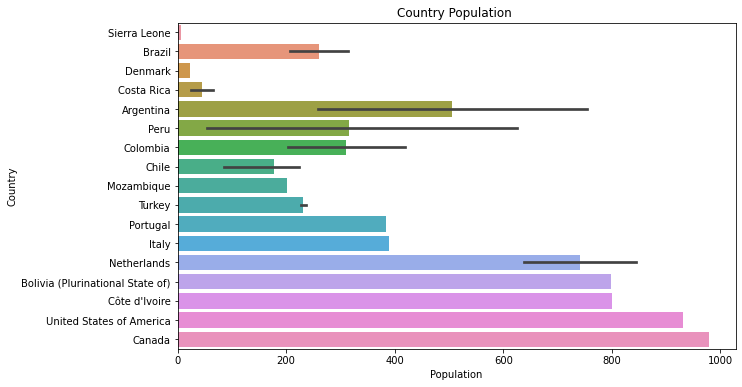

In [27]:
### Country Population 

population = data.sort_values(by="Population", ascending=True)[:100]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=population.Country, x=population.Population)
plt.xticks()
plt.xlabel('Population')
plt.ylabel('Country')
plt.title('Country Population ')
plt.show()

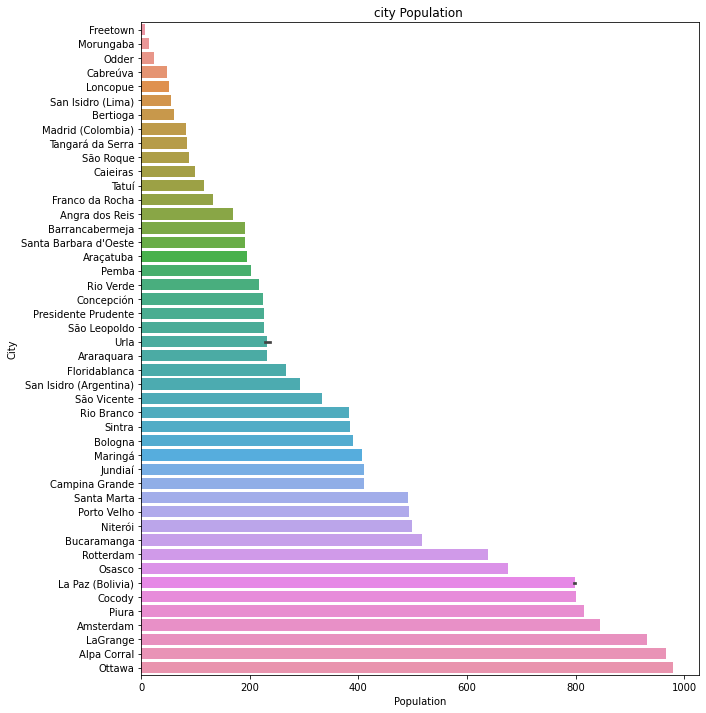

In [30]:
### Citywise Population 
population = data.sort_values(by="Population", ascending=True)[:100]
figure = plt.figure(figsize=(10,12))
sns.barplot(y=population.City, x=population.Population)
plt.xticks()
plt.xlabel('Population')
plt.ylabel('City')
plt.title('city Population ')
plt.show()

In [31]:
data

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update,Account_Number,Population_Year,Reporting_Authority
0,2018,58671,Helsingør Kommune / Elsinore Municipality,Helsingør,Denmark,Europe,CDP Cities,public,No,62686.0,2017,POINT (12.5921 56.0308),2020-06-25T04:52:49.050,58671,2017,CDP Cities
1,2018,59167,Municipalidad de Providencia,Providencia,Chile,Latin America,CDP Cities,public,No,126487.0,2012,POINT (-70.6092 -33.4313),2020-06-25T04:52:49.050,59167,2012,CDP Cities
2,2018,50553,City of Fresno,Fresno,United States of America,North America,CDP Cities,public,Yes,527438.0,2017,POINT (-119.773 36.7468),2020-06-25T04:52:49.050,50553,2017,CDP Cities
3,2018,826407,Munícipio de Mirandela,Mirandela,Portugal,Europe,CDP Cities,public,Yes,11852.0,2011,POINT (-7.1753 41.51),2020-06-25T04:52:49.050,826407,2011,CDP Cities
4,2018,60375,Gobiernación del Archipiélago de San Andrés,Archipiélago de San Andrés,Colombia,Latin America,CDP Cities,public,No,120000.0,2017,POINT (-81.6976 12.5794),2020-06-25T04:52:49.050,60375,2017,CDP Cities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2020,35874,City of Phoenix,Phoenix,United States of America,North America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,1660272.0,2018,POINT (-112.074 33.4484),2020-09-07T09:45:19.793,35874,2018,"C40,CDP Cities,ICLEI - Local Governments for S..."
562,2020,42178,Distrito Metropolitano de Quito,Quito,Ecuador,Latin America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,2239191.0,2010,POINT (-78.5167 -0.2333),2020-09-07T09:45:19.793,42178,2010,"C40,CDP Cities,ICLEI - Local Governments for S..."
563,2020,848129,Esquías,NaN,Honduras,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,Yes,18308.0,2018,NaN,2020-09-07T09:45:19.793,848129,2018,"CDP Cities,ICLEI - Local Governments for Susta..."
564,2020,54632,Prefeitura de Caruaru,Caruaru,Brazil,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,314912.0,2010,NaN,2020-09-07T09:45:19.793,54632,2010,"CDP Cities,ICLEI - Local Governments for Susta..."


## Year Reported to CDP

In [32]:
data['Year_Reported_to_CDP'] = data['Year Reported to CDP']
data['Account_Number'] = data['Account Number']
data

,Year Reported to CDP,Account Number,Organization,City,Country,CDP Region,Reporting Authority,Access,First Time Discloser,Population,Population Year,City Location,Last update,Account_Number,Population_Year,Reporting_Authority,Year_Reported_to_CDP
0,2018,58671,Helsingør Kommune / Elsinore Municipality,Helsingør,Denmark,Europe,CDP Cities,public,No,62686.0,2017,POINT (12.5921 56.0308),2020-06-25T04:52:49.050,58671,2017,CDP Cities,2018
1,2018,59167,Municipalidad de Providencia,Providencia,Chile,Latin America,CDP Cities,public,No,126487.0,2012,POINT (-70.6092 -33.4313),2020-06-25T04:52:49.050,59167,2012,CDP Cities,2018
2,2018,50553,City of Fresno,Fresno,United States of America,North America,CDP Cities,public,Yes,527438.0,2017,POINT (-119.773 36.7468),2020-06-25T04:52:49.050,50553,2017,CDP Cities,2018
3,2018,826407,Munícipio de Mirandela,Mirandela,Portugal,Europe,CDP Cities,public,Yes,11852.0,2011,POINT (-7.1753 41.51),2020-06-25T04:52:49.050,826407,2011,CDP Cities,2018
4,2018,60375,Gobiernación del Archipiélago de San Andrés,Archipiélago de San Andrés,Colombia,Latin America,CDP Cities,public,No,120000.0,2017,POINT (-81.6976 12.5794),2020-06-25T04:52:49.050,60375,2017,CDP Cities,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,2020,35874,City of Phoenix,Phoenix,United States of America,North America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,1660272.0,2018,POINT (-112.074 33.4484),2020-09-07T09:45:19.793,35874,2018,"C40,CDP Cities,ICLEI - Local Governments for S...",2020
562,2020,42178,Distrito Metropolitano de Quito,Quito,Ecuador,Latin America,"C40,CDP Cities,ICLEI - Local Governments for S...",public,No,2239191.0,2010,POINT (-78.5167 -0.2333),2020-09-07T09:45:19.793,42178,2010,"C40,CDP Cities,ICLEI - Local Governments for S...",2020
563,2020,848129,Esquías,NaN,Honduras,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,Yes,18308.0,2018,NaN,2020-09-07T09:45:19.793,848129,2018,"CDP Cities,ICLEI - Local Governments for Susta...",2020
564,2020,54632,Prefeitura de Caruaru,Caruaru,Brazil,Latin America,"CDP Cities,ICLEI - Local Governments for Susta...",public,No,314912.0,2010,NaN,2020-09-07T09:45:19.793,54632,2010,"CDP Cities,ICLEI - Local Governments for Susta...",2020


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


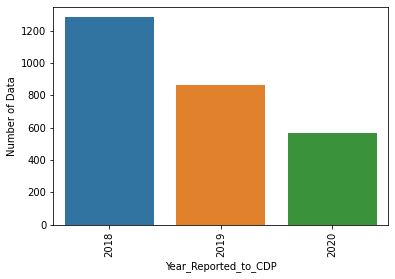

In [34]:
YR_CDP = data["Year_Reported_to_CDP"].value_counts()[:100]
plt.figure(figsize=(6,4))
sns.barplot(YR_CDP.index, YR_CDP.values)
plt.ylabel('Number of Data')
plt.xlabel('Year_Reported_to_CDP')
plt.xticks(rotation=90)
plt.show();

In the chart above you can see in the 2018 of yr_cdp were higher than that of the other years

In [35]:
cdp = pd.read_csv("/content/Cities_Disclosing_to_CDP_Data_Dictionary.csv")

In [37]:
cdp

,field,description,column _entries,example
0,Year Reported to CDP,Cities Disclosure cycle survey year.,2020,NaN
1,Account Number,The unique identifier given to every city orga...,49335,NaN
2,Organization,Name of the City organisation disclosing,Metropolitan Government of Nashville and David...,NaN
3,City,Name of the City the city organisation is disc...,Nashville,NaN
4,Country,Country of city,United States of America,NaN
5,CDP Region,CDP operation region City is located within,North America,NaN
6,Reporting Authority,CDP collects information on behalf of a number...,"C40,CDP Cities,ICLEI - Local Governments for S...",Includes Global Covenant of Mayors for Climate...
7,Access,Cities can submit CDP response in public statu...,public,NaN
8,First Time Discloser,Is the City disclosing for the first time to CDP,No,NaN
9,Population,Citiy population estimate,692587,NaN


In [38]:
cdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   field            13 non-null     object
 1   description      13 non-null     object
 2   column _entries  13 non-null     object
 3   example          1 non-null      object
dtypes: object(4)
memory usage: 544.0+ bytes


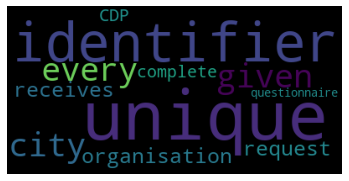

In [44]:
text = cdp.description[1]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()